In [25]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# !pip install mglearn
import mglearn

In [26]:
###1.데이터 수집&확인
taxi_train=pd.read_csv('C:/taxi_train.csv',nrows=2000000)

"""

Topic of data handling 

1. fare_amount.min() : minus value --> drop fare_amount is -(value) 
2. Remove data having Null value 
3. Remove data having 'passenger_count' value is 0
4. Minimum longitude/lattitude coordinates are way off --> remove them
5 .Average fare_amount is about $11.4 with a standard deviation of $9.853 
6 .building a predictive model better than $9.853 

"""

taxi_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [27]:
taxi_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [28]:
taxi_test.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [29]:
taxi_test.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [30]:
print(taxi_train.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    14
dropoff_latitude     14
passenger_count       0
dtype: int64


In [31]:
print(taxi_test.isnull().sum()) 

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [33]:
#1.fare_amount<0제외

print("old : {}".format(len(taxi_train)))# 2000000

taxi_train=taxi_train[-(taxi_train['fare_amount']<0)]
print("new : {}".format(len(taxi_train))) # 1999923


old : 1999923
new : 1999923


In [35]:
#2.null값 제외

print("old : {}".format(len(taxi_train)))# 2000000

taxi_train=taxi_train[-(taxi_train['dropoff_longitude'].isnull())&-(taxi_train['dropoff_latitude'].isnull())]
print("new : {}".format(len(taxi_train))) # 1999909


old : 1999923
new : 1999909


In [36]:
#3. Remove data having 'passenger_count' value is 0

print("old : {}".format(len(taxi_train))) # 1999909

taxi_train=taxi_train[taxi_train.passenger_count!=0]
print("new : {}".format(len(taxi_train))) # 1992800


old : 1999909
new : 1992800


In [37]:
#4.Minimum longitude/lattitude coordinates are way off --> remove them

"""
Add two new features 'abs_diff_longitude' and 'abs_diff_latitude' representing the 'Manhattan vector'
from the pickup location to dropoff location
"""

taxi_train['abs_diff_longitude']=abs(taxi_train['dropoff_longitude']-taxi_train['pickup_longitude'])  

taxi_train['abs_diff_latitude']=abs(taxi_train['dropoff_latitude']-taxi_train['pickup_latitude'])  

taxi_train.describe() 

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
count,1.992800e+06,1.992800e+06,1.992800e+06,1.992800e+06,1.992800e+06,1.992800e+06,1.992800e+06,1.992800e+06
mean,1.135728e+01,-7.252260e+01,3.992921e+01,-7.252383e+01,3.992792e+01,1.690130e+00,1.912866e-01,1.238827e-01
std,9.861224e+00,1.287817e+01,7.991356e+00,1.278346e+01,1.033696e+01,1.313460e+00,9.512442e+00,1.010385e+01
min,0.000000e+00,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073490e+01,-7.399141e+01,4.073399e+01,1.000000e+00,5.805969e-03,6.592000e-03
50%,8.500000e+00,-7.398181e+01,4.075262e+01,-7.398016e+01,4.075312e+01,1.000000e+00,1.245000e-02,1.387000e-02
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396368e+01,4.076809e+01,2.000000e+00,2.372200e-02,2.695500e-02
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02,5.448388e+03,5.486099e+03


In [41]:
# one degree of latitude is about 69 miles. 
# Based on the scatterplot, safely exclude values above 5

taxi_train=taxi_train[(taxi_train['abs_diff_longitude']<=5)&(taxi_train['abs_diff_latitude']<=5)]
taxi_train.describe() 
  

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
count,1.988834e+06,1.988834e+06,1.988834e+06,1.988834e+06,1.988834e+06,1.988834e+06,1.988834e+06,1.988834e+06
mean,1.135042e+01,-7.258541e+01,3.995926e+01,-7.258453e+01,3.995960e+01,1.690094e+00,2.255955e-02,2.112525e-02
std,9.840858e+00,1.053685e+01,6.227083e+00,1.053673e+01,6.227120e+00,1.313370e+00,3.941215e-02,2.890618e-02
min,0.000000e+00,-2.647971e+03,-1.185391e+03,-2.647971e+03,-1.185391e+03,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399209e+01,4.073497e+01,-7.399142e+01,4.073405e+01,1.000000e+00,5.795000e-03,6.581000e-03
50%,8.500000e+00,-7.398183e+01,4.075265e+01,-7.398019e+01,4.075315e+01,1.000000e+00,1.242000e-02,1.383800e-02
75%,1.250000e+01,-7.396720e+01,4.076712e+01,-7.396377e+01,4.076811e+01,2.000000e+00,2.362061e-02,2.684500e-02
max,1.273310e+03,4.085036e+01,1.963516e+03,4.088638e+01,1.963516e+03,2.080000e+02,4.951542e+00,4.991325e+00


In [42]:
print("new : {}".format(len(taxi_train)))        

new : 1988834


In [44]:
# Remove (abs_diff_longitude = 0) and (abs_diff_latitude = 0) #

taxi_train=taxi_train[(taxi_train.abs_diff_longitude!=0)&(taxi_train.abs_diff_latitude!=0)]

print("new : {}".format(len(taxi_train)))


new : 1931337


In [45]:
## Visualization ##

#시계열 taxi_test = pd.read_csv("C:/taxi_test.csv",parse_dates=["pickup_datetime"]) 
taxi_test.describe()

taxi_test.isnull().sum().to_frame() # no missing value 


,0
key,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [47]:
### Location data ###

## Easy to use map and GPS tool: https://www.gps-coordinates.net/ 
## Calculate distance between locations: https://www.travelmath.com/flying-distance/
## Open street map to grab using bouding box a map: https://www.openstreetmap.org/export#map=8/52.154/5.295

#### Handling some of minimun and maxinum longitude/lattitude coordinates being way off ####

## new york 좌표 틀 : https://ko.wikipedia.org/wiki/%ED%8B%80:%EC%9C%84%EC%B9%98_%EC%A7%80%EB%8F%84_%EB%AF%B8%EA%B5%AD_%EB%89%B4%EC%9A%95 ##

## first method(breemen way) : Define a bounding box of interest by [long_min,long_max,latt_min,latt_max] using the minimum and maximum coordinates form the testset
 # --> This way, he think that being able to train a model for the full pickup/dropoff coordinate range of the test set

## Second method(my thought): new york 좌표 틀 이용 --> [long_min,long_max,latt_min,latt_max]  : [-74.27,-73.68,40.49,40.92]

# minimum and maximum longitude test set #

min(taxi_test.pickup_longitude.min(), taxi_test.dropoff_longitude.min()), \
max(taxi_test.pickup_longitude.max(), taxi_test.dropoff_longitude.max()) # (-74.263242, -72.986532) #


(-74.263242, -72.986532)

In [48]:
# minimum and maximum latitude test set #

min(taxi_test.pickup_latitude.min(), taxi_test.dropoff_latitude.min()), \
max(taxi_test.pickup_latitude.max(), taxi_test.dropoff_latitude.max()) # (40.568973, 41.709555) #


(40.568973, 41.709555)

In [49]:
# for the first way #

def select_within_boundingbox(df, BB):
    # BB[0] : min(df_test.pickup_longitude) / BB[1] : min(df_test.dropoff_longitude)
    # BB[2] : max(df_test.pickup_longitude) / BB[3] : max(df_test.dropofff_longitude)
    
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])    

In [50]:
# load imageg of NYC map #

BB = (-74.5,-72.8,40.5,41.8) # Q) : Why doesn't use max and min value of testset
nyc_map = plt.imread('https://aiblog.nl/download/nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoon in on NYC #

BB_zoom = (-74.3,-73.7,40.5,40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')

In [52]:
print("old size : {}".format(len(taxi_train))) 
print()

taxi_train = taxi_train[select_within_boundingbox(taxi_train,BB)] 
# test set에 들어 있는 pickup 관련 최대,최소 경위도와 dropoff 관련 최대,최소 경위도 안에 있는 경위도를 trainset의 범위로 산정
print("new size : {}".format(len(taxi_train))) 


old size : 1931337

new size : 1929406


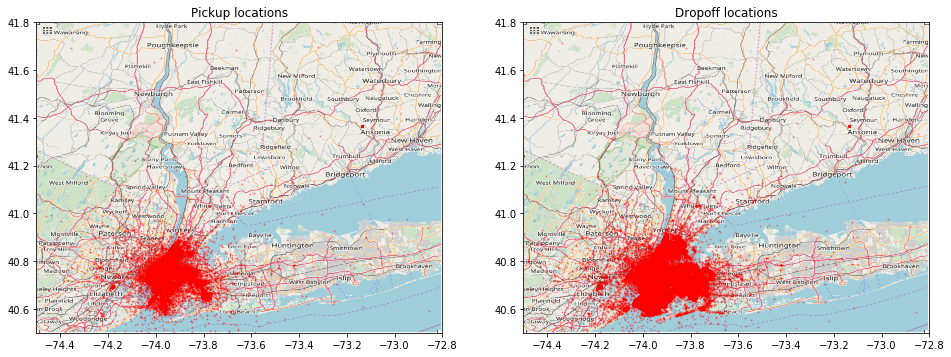

In [54]:
# For plotting data on the NYC map #

def plot_on_map(df,BB,nyc_map,s=10,alpha=0.2):
    fig, axs = plt.subplots(1,2,figsize=(16,10))
    axs[0].scatter(df.pickup_longitude,df.pickup_latitude,zorder=1,alpha=alpha,c='r',s=s)
    axs[0].set_xlim((BB[0],BB[1]))
    axs[0].set_ylim((BB[2],BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map,zorder=0,extent=BB)
    
    axs[1].scatter(df.dropoff_longitude,df.dropoff_latitude,zorder=1,alpha=alpha,c='r',s=s)
    axs[1].set_xlim((BB[0],BB[1]))
    axs[1].set_ylim((BB[2],BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map,zorder=0,extent=BB)       
    
# Plot training data on map #

plot_on_map(taxi_train,BB,nyc_map,s=1,alpha=0.3)

In [57]:
#test set 점검
taxi_test['abs_diff_longitude']=abs(taxi_test['dropoff_longitude']-taxi_test['pickup_longitude'])  
taxi_test['abs_diff_latitude']=abs(taxi_test['dropoff_latitude']-taxi_test['pickup_latitude'])  

taxi_test = taxi_test[-((taxi_test.abs_diff_longitude == 0) & (taxi_test.abs_diff_latitude == 0))]

In [59]:
taxi_test = taxi_test[(taxi_test.abs_diff_longitude < 5.0) & (taxi_test.abs_diff_latitude < 5.0)]

In [60]:
taxi_test.describe() 

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude
count,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000,9829.000000
mean,-73.975177,40.750779,-73.974102,40.751487,1.670668,0.023550,0.022324
std,0.039231,0.031166,0.035135,0.033218,1.278280,0.036813,0.025616
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,0.000000,0.000005
25%,-73.992569,40.736084,-73.991275,40.735196,1.000000,0.006500,0.007436
50%,-73.982365,40.753045,-73.980083,40.754056,1.000000,0.013257,0.014855
75%,-73.968173,40.767043,-73.964295,40.768748,2.000000,0.024717,0.028399
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,0.849168,0.633213


In [62]:
#Linear Model
#OLS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

trainx=taxi_train.iloc[:,[8,9]]
trainy=taxi_train.iloc[:,1:2]
X_test=taxi_test.iloc[:,[7,8]]

trainx.head() 

,abs_diff_longitude,abs_diff_latitude
0,0.002701,0.009041
1,0.036780,0.070701
2,0.008504,0.010708
3,0.004437,0.024949
4,0.011440,0.015754


In [63]:
trainy.head()

,fare_amount
0,4.5
1,16.9
2,5.7
3,7.7
4,5.3


In [64]:
X_test.head() 

,abs_diff_longitude,abs_diff_latitude
0,0.008110,0.019970
1,0.012024,0.019817
2,0.002870,0.005121
3,0.009288,0.016172
4,0.022519,0.045348


In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trainx) 
scaler.transform(trainx) 

array([[0.00226258, 0.01026264],
       [0.03082048, 0.08025428],
       [0.00712544, 0.01215489],
       ...,
       [0.02239364, 0.02461853],
       [0.01181651, 0.05083532],
       [0.03382468, 0.04678974]])

In [66]:
#1.OLS
lr = LinearRegression().fit(trainx,trainy) 

print("lr_coef : {}".format(lr.coef_))
print()


print("lr_intercept : {}".format(lr.intercept_))
print("train score : {}".format(lr.score(trainx,trainy)))
print() 

lr_coef : [[167.14956137 119.45165443]]

lr_intercept : [4.90533166]
train score : 0.678600933025017



In [67]:
#2.Ridge
from sklearn.linear_model import Ridge
ridge = Ridge().fit(trainx,trainy) # default value of alpha = 1.0

print("trainset score : {}".format(ridge.score(trainx,trainy)))


trainset score : 0.6786008472909703


In [68]:

## Alpha 매개 변수를 어떻게 설정해야 가장 좋은 성능을 가진 모델을 가질 수 있을까? ##

# 간단한 Grid Search 방법 : for() #

train_accuracy = []

for alpha in np.arange(0,30,0.05):
    # generate model
    ridge = Ridge(alpha = alpha).fit(trainx,trainy)
    # append accuracy of trainset
    train_accuracy.append(ridge.score(trainx,trainy))
    

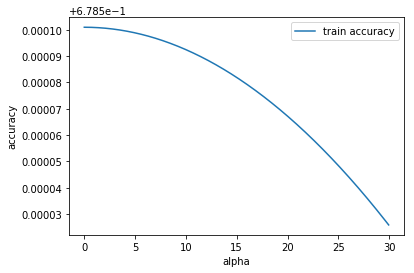

In [69]:
plt.plot(np.arange(0,30,0.05),train_accuracy,label = "train accuracy")
plt.ylabel("accuracy")
plt.xlabel("alpha")
plt.legend()


In [70]:
train_accuracy = pd.DataFrame({'accuracy':train_accuracy,'index' : np.arange(0,30,0.05)})
train_accuracy

,accuracy,index
0,0.678601,0.00
1,0.678601,0.05
2,0.678601,0.10
3,0.678601,0.15
4,0.678601,0.20
5,0.678601,0.25
6,0.678601,0.30
7,0.678601,0.35
8,0.678601,0.40
9,0.678601,0.45


In [71]:
train_accuracy.max()  

accuracy     0.678601
index       29.950000
dtype: float64

In [72]:
#3.Lasso
from sklearn.linear_model import Lasso

lasso = Lasso().fit(trainx,trainy) # In Lasso default value of alpha is 1 
print("train set score : {}".format(lasso.score(trainx,trainy)))
print("feature number : {}".format(np.sum(lasso.coef_ !=0)))


train set score : 0.0
feature number : 0


In [73]:

## 과소적합 방지를 위해 alpha값을 줄인다. ##

# 1. max_iter(반복 실행하는 최대 횟수)의 기본값을 늘린다. #

lasso001 = Lasso(alpha = 0.01,max_iter = 100000).fit(trainx,trainy)
print("train set score : {}".format(lasso001.score(trainx,trainy)))
print("feature number : {}".format(np.sum(lasso001.coef_ !=0))) # 2

# Alpha값을 너무 낮추면 규제 효과가 사라져 과대적합이 되므로 OLS 방식과 비슷해 진다. #

lasso00001 = Lasso(alpha = 0.0001,max_iter = 100000).fit(trainx,trainy)
print("train set score : {}".format(lasso00001.score(trainx,trainy)))
print("feature number : {}".format(np.sum(lasso00001.coef_ !=0))) # 2 

train set score : 0.6767309330314737
feature number : 2
train set score : 0.6786007478710152
feature number : 2
